### Analysis of the Top Songs at the End of 2023

With this spotify data set from Kaggle; 

https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023?resource=download

Let's discover just what it takes for artists to break through the noise and make an impact with their music. 

Using numerical KPI's such as total streams and playlist appearences to musical indicators such as BPM (beats per minute), Key and Mode come with me as we discover what it takes to make a hit and who came out on top. 


#### Methodology 

- Gather data
- Wrangle and clean data where necessary 
- Group and visualise the data

#### Key Findings

- There were 645 unique artists in the 2023 Top Songs list
- Taylor Swift was the most successful artist with 34 appearances, followed by The Weeknd with 22
- The Weeknd was the most streamed artist with almost 14.2 billion streams, followed by Taylor Swift with 14.05 billion and Ed Sheeran with 13.9 billion
- Despite having the most songs in the list and being the second most streamed artist, Taylor Swift didn't have any songs in the top 5 most streamed 
- The most common BPM for songs on this list was 120 bpm with 39 songs being this tempo
- And the most common Key was C# with 120 songs being in this Key, including the 3 most popular songs by streams
- Mode was a fairly even split with Major just edging out minor by 147 songs
- Songs with only one contributing artist were overall more successful than songs with multiple artists in terms of streams

#### Import libraries and data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
path = r"C:\Users\brayd\Data Analysis Notebooks\Top Songs of 2023\spotify-2023.csv"

data = pd.read_csv(path, encoding='latin-1')

#### Exploring the data

Looking into some basic information about the data such as columns and their data types, simple numerical statistics and whether there are any missing values or duplicates which need to be taken care of. 

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    int64 
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [66]:
data['streams'] = data['streams'].astype('int64')


In [67]:
data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,9.530000e+02,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,5.135979e+08,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,5.668039e+08,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,1.413817e+08,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,2.902286e+08,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,6.738011e+08,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [68]:
data.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [69]:
data.duplicated().sum()

0

#### Top Artist  & Song Information 

Let's find out some information about the artists and songs appearing in this data set. 

How many unique artists are there? 

Who are the top 5 appearing artists, how many times do they appear? 

Who are the top 5 artists in terms of total streams? 

What are the top 5 artists by playlist appearances?

What are the top 5 songs by stream? 

What are the top 5 songs by playlist appearances? 

- How many unique artists in dataset? 

In [91]:
unique_artists = data['artist(s)_name'].nunique()
print('There are ', unique_artists, " unique artists.")

There are  645  unique artists.


- Most common Artists in dataset

In [236]:
artist_counts = data['artist(s)_name'].value_counts().reset_index().head(5)
print("Here are the top 5 reoccuring artists:")
print(artist_counts)


Here are the top 5 reoccuring artists:
  artist(s)_name  count
0   Taylor Swift     34
1     The Weeknd     22
2      Bad Bunny     19
3            SZA     19
4   Harry Styles     17


- Top artists by streams

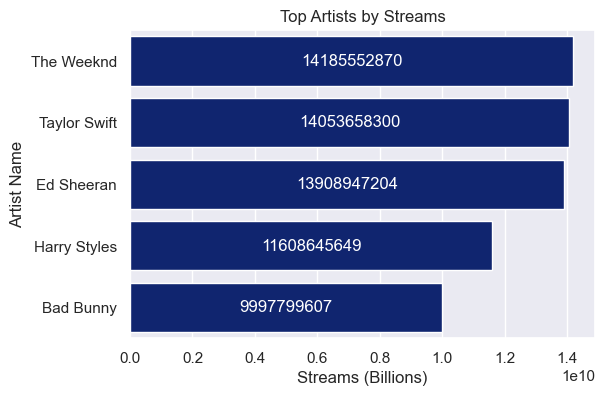

In [114]:
sns.set_theme(style="darkgrid", palette="dark")
plt.figure(figsize=(6, 4))

sns.barplot(x='streams', y='artist(s)_name', data=top_artists_by_streams, legend=False)

plt.xlabel('Streams (Billions)')
plt.ylabel('Artist Name')
plt.title('Top Artists by Streams')

for index, value in enumerate(top_artists_by_streams['streams']):
    plt.text(value / 2, index, str(value), ha='center', va='center', color='white')

plt.show()

- Top Artists by Spotify Playlist Appearances

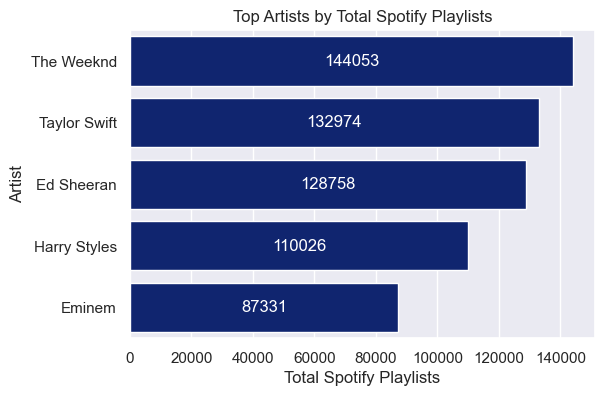

In [115]:
total_spotify_playlists = data.groupby('artist(s)_name')['in_spotify_playlists'].sum().reset_index().sort_values(by='in_spotify_playlists', ascending=False).head(5)

sns.set_theme(style="darkgrid", palette="dark")
plt.figure(figsize=(6, 4))

sns.barplot(x='in_spotify_playlists', y='artist(s)_name', data=total_spotify_playlists)

plt.xlabel('Total Spotify Playlists')
plt.ylabel('Artist')
plt.title('Top Artists by Total Spotify Playlists')

for index, value in enumerate(total_spotify_playlists['in_spotify_playlists']):
    plt.text(value / 2, index, str(value), ha='center', va='center', color='white')

plt.show()


- Top Songs by Streams

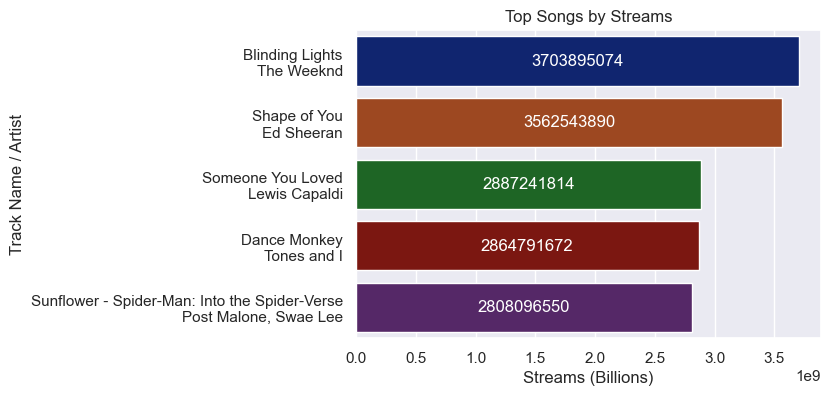

In [235]:
top_song_streams = data.groupby('track_name')[['artist(s)_name','streams']].sum().reset_index().sort_values(by='streams', ascending=False).head(5)

top_song_streams['combined_labels'] = top_song_streams['track_name'] +  '\n'  + top_song_streams['artist(s)_name']

sns.set_theme(style="darkgrid", palette="dark")
plt.figure(figsize=(6, 4))

sns.barplot(x='streams', y='combined_labels', data=top_song_streams, hue='combined_labels', legend=False)

plt.xlabel('Streams (Billions)')
plt.ylabel('Track Name / Artist')
plt.title('Top Songs by Streams')

for index, value in enumerate(top_song_streams['streams']):
    plt.text(value / 2, index, str(value), ha='center', va='center', color='white')

plt.show()

- Top Songs by Playlist Appearances 

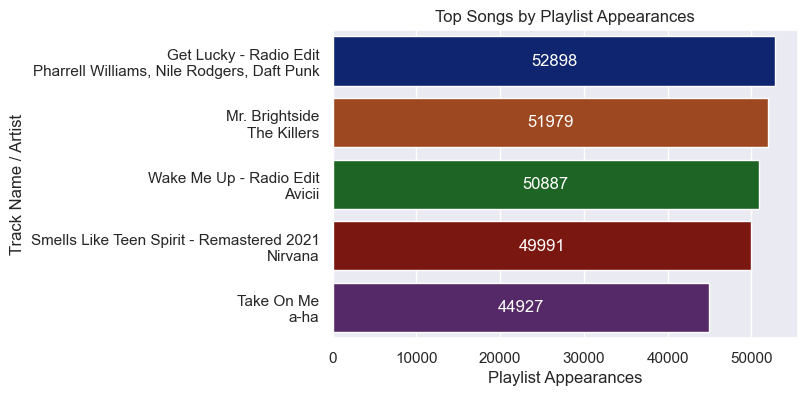

In [147]:
top_song_playlist = data.groupby('track_name')[['artist(s)_name','in_spotify_playlists']].sum().reset_index().sort_values(by='in_spotify_playlists', ascending=False).head(5)

top_song_playlist['combined_labels'] = top_song_playlist['track_name'] +  '\n'  + top_song_playlist['artist(s)_name']

sns.set_theme(style="darkgrid", palette="dark")
plt.figure(figsize=(6, 4))

sns.barplot(x='in_spotify_playlists', y='combined_labels', data=top_song_playlist, hue='combined_labels', legend=False)

plt.xlabel('Playlist Appearances')
plt.ylabel('Track Name / Artist')
plt.title('Top Songs by Playlist Appearances')

for index, value in enumerate(top_song_playlist['in_spotify_playlists']):
    plt.text(value / 2, index, str(value), ha='center', va='center', color='white')

plt.show()

#### Musical Information

Lets dig into some of the data provided about the songs themselves. 

First we're going to find the most common BPM, Keys and Modes and then see if this matches with the most popular songs we discovered previously. 

- Most common BPM

In [188]:
BPM_counts = data['bpm'].value_counts().reset_index().head(5)
print("Here are the 5 most common BPM's:")
print(BPM_counts)


Here are the 5 most common BPM's:
   bpm  count
0  120     39
1  140     31
2  130     31
3   92     25
4  110     24


- Most Popular BPM by Streams

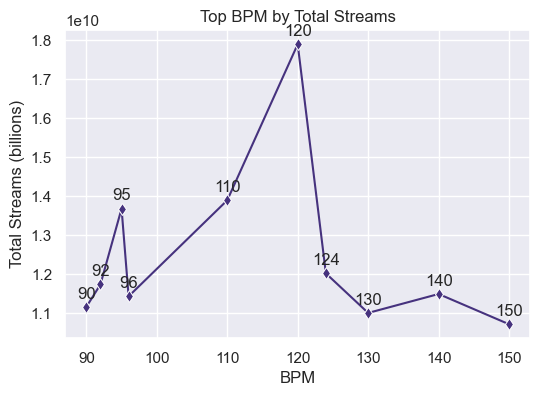

In [189]:
bpm_by_streams = data.groupby('bpm')['streams'].sum().reset_index().sort_values(by='streams', ascending=False).head(10)

sns.set_theme(style="darkgrid", palette="viridis")
plt.figure(figsize=(6, 4))

sns.lineplot(x='bpm', y='streams', data=bpm_by_streams, marker='d')

plt.xlabel('BPM')
plt.ylabel('Total Streams (billions)')
plt.title('Top BPM by Total Streams')

for index, row in bpm_by_streams.iterrows():
    plt.annotate(f"{row['bpm']}", (row['bpm'], row['streams']), textcoords="offset points", xytext=(0, 6), ha='center')

plt.show()

- Most Common Key

In [187]:
key_counts = data['key'].value_counts().reset_index().head(5)
print("Here are the 5 most common Keys:")
print(key_counts)


Here are the 5 most common Keys:
  key  count
0  C#    120
1   G     96
2  G#     91
3   F     89
4   B     81


- Most Popular Key by Streams

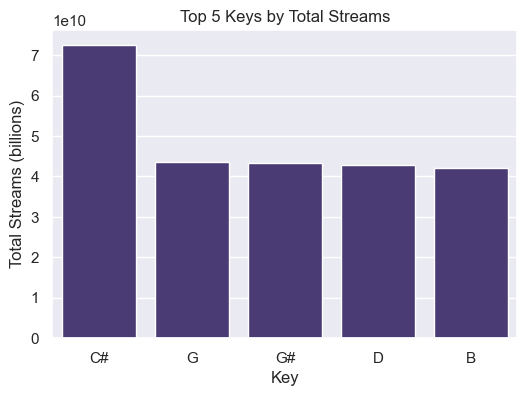

In [183]:
keys_by_streams = data.groupby('key')['streams'].sum().reset_index().sort_values(by='streams', ascending=False).head(5)

sns.set_theme(style="darkgrid", palette="viridis")
plt.figure(figsize=(6, 4))

sns.barplot(x='key', y='streams', data=keys_by_streams)

plt.xlabel('Key')
plt.ylabel('Total Streams (billions)')
plt.title('Top 5 Keys by Total Streams')

plt.show()

- Most Common Mode

In [191]:
mode_counts = data['mode'].value_counts().reset_index().head(2)
print("Here is the most common mode:")
print(mode_counts)


Here is the most common mode:
    mode  count
0  Major    550
1  Minor    403


- Most Popular Mode by Streams

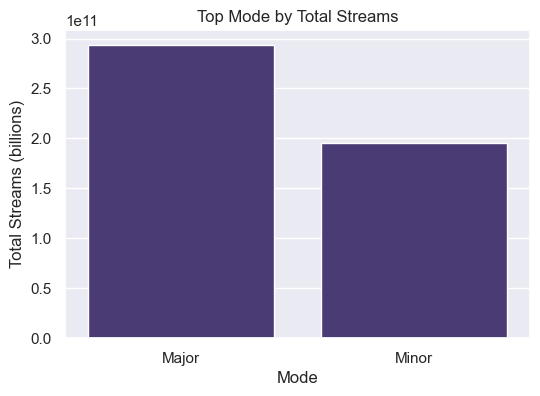

In [169]:
mode_by_streams = data.groupby('mode')['streams'].sum().reset_index().sort_values(by='streams', ascending=False).head()

sns.set_theme(style="darkgrid", palette="viridis")
plt.figure(figsize=(6, 4))

sns.barplot(x='mode', y='streams', data=mode_by_streams)

plt.xlabel('Mode')
plt.ylabel('Total Streams (billions)')
plt.title('Top Mode by Total Streams')

plt.show()

- Top 5 most streamed songs and their Key, BPM and Mode

In [209]:
top_song_streams = data.groupby('track_name')[['artist(s)_name','streams','key','bpm','mode']].sum().reset_index().sort_values(by='streams', ascending=False).head(5)
top_song_streams

,track_name,artist(s)_name,streams,key,bpm,mode
100,Blinding Lights,The Weeknd,3703895074,C#,171,Major
693,Shape of You,Ed Sheeran,3562543890,C#,96,Minor
723,Someone You Loved,Lewis Capaldi,2887241814,C#,110,Major
184,Dance Monkey,Tones and I,2864791672,F#,98,Minor
753,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2808096550,D,90,Major


#### Extras

- Correlation of Musical Features

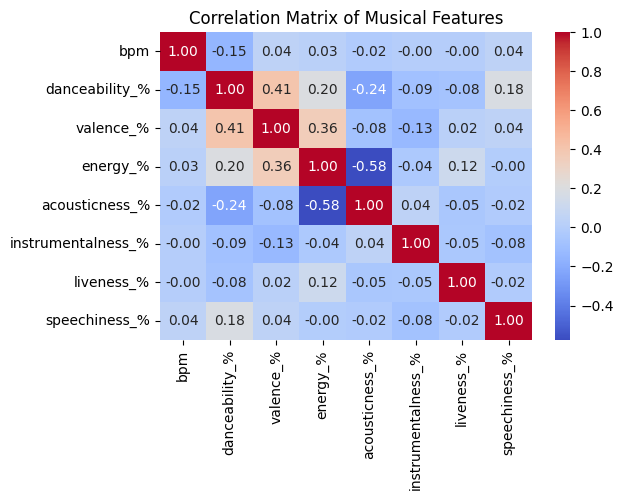

In [5]:
musical_features = [
    'bpm', 'danceability_%', 'valence_%', 'energy_%',
    'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'
]

correlation_matrix = data[musical_features].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Musical Features')
plt.show()

- Single Artist Vs Multiple Artists by Streams

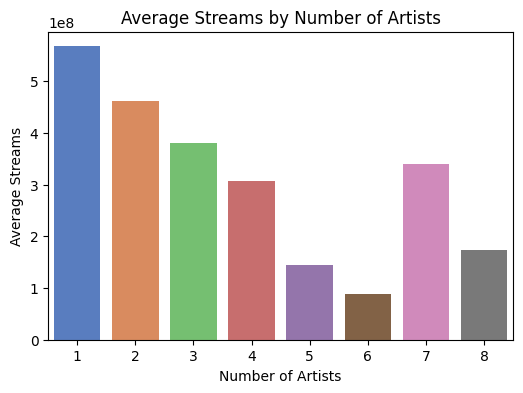

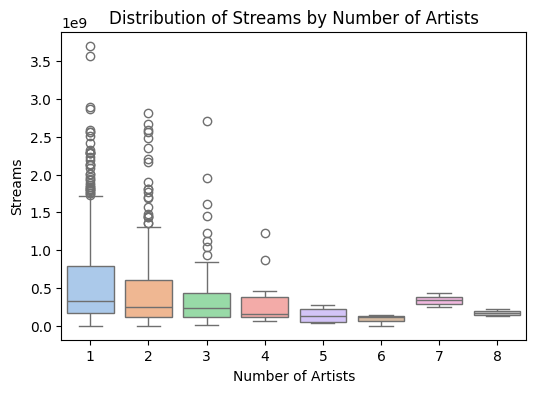

In [6]:
grouped_artists = data.groupby('artist_count')['streams'].mean().reset_index()


plt.figure(figsize=(6, 4))
sns.barplot(x='artist_count', y='streams', data=grouped_artists, palette='muted', hue='artist_count', legend=False)
plt.title('Average Streams by Number of Artists')
plt.xlabel('Number of Artists')
plt.ylabel('Average Streams')
plt.show()


plt.figure(figsize=(6, 4))
sns.boxplot(x='artist_count', y='streams', data=data, palette='pastel', hue='artist_count', legend=False)
plt.title('Distribution of Streams by Number of Artists')
plt.xlabel('Number of Artists')
plt.ylabel('Streams')
plt.show()
